<a href="https://colab.research.google.com/github/saikiranmuthuluri/Wine-Quality-Prediction/blob/main/Wine_quality_analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

Loading Data set

In [96]:
# Loading dataset
df = pd.read_csv('/content/wine quality prediction.csv')

Checking Data set

In [97]:
# Checking the first few rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [98]:
# Checking the last few rowd of the dataset
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [99]:
# Geting basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [100]:
# Geting summary statistics for numerical columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [101]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Checking for missing values

In [102]:
# Checking for missing values with total sum
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<Axes: >

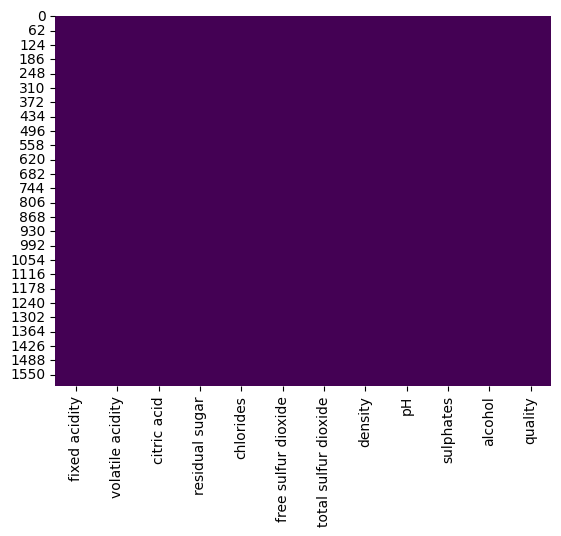

In [103]:
# Visualizing missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

Data Balancing

In [104]:
# Checking class distribution for 'quality' column
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [105]:
# If imbalance exists, consider using oversampling/undersampling techniques
from imblearn.over_sampling import SMOTE
X = df.drop('quality', axis=1)
y = df['quality']

In [106]:
# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [107]:
# Checking new distribution after balancing
y_resampled.value_counts()

,count
quality,
5,681
6,681
7,681
4,681
8,681
3,681


Outlier Detection

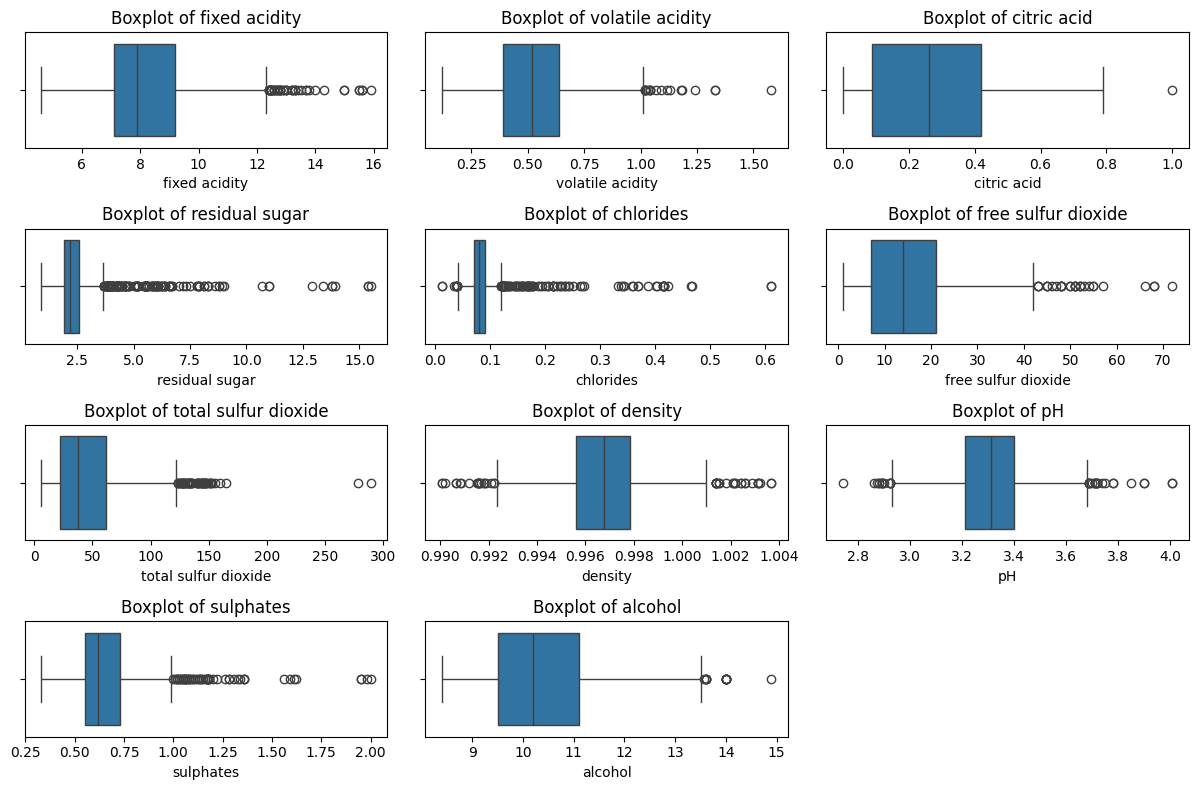

In [108]:
# Detecting outliers using boxplots for each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Data distribution

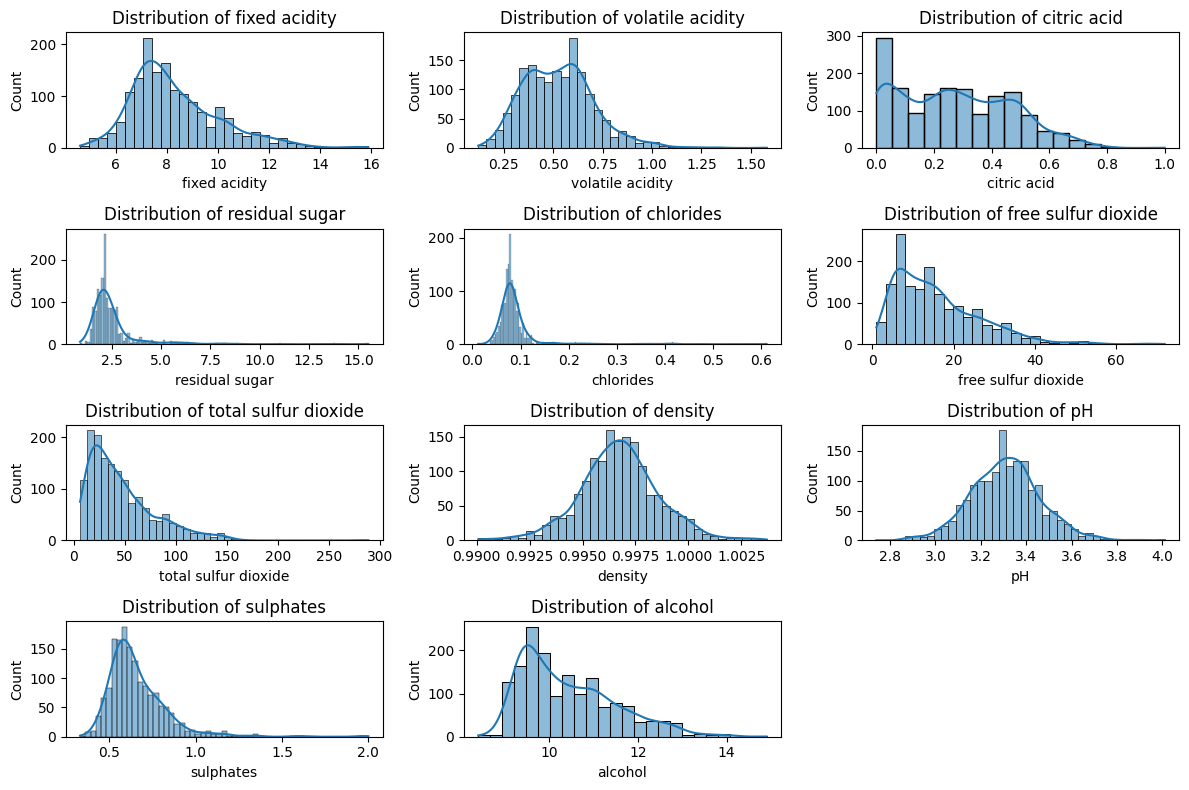

In [109]:
# Plotting the distribution of numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

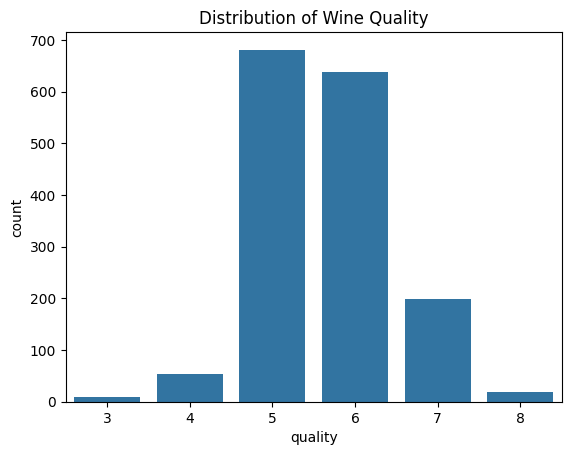

In [110]:
# Plotting the distribution of the target variable 'quality'
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()

Scaling

In [111]:
# Scaling the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [112]:
# Checking if the scaling worked by viewing the mean and std deviation
print(f'Mean: {X_scaled.mean(axis=0)}')
print(f'Standard Deviation: {X_scaled.std(axis=0)}')

Mean: [-8.06881619e-16 -3.47793801e-17  1.94764529e-16  8.69484503e-19
  8.34705123e-17 -1.32161644e-16 -1.66941025e-16  9.05655058e-15
  1.36335170e-15  2.78235041e-16  1.22423418e-15]
Standard Deviation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Splitting dataset

In [113]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [114]:
# Checking the shape of the splits
print(f'Training Features Shape: {X_train.shape}')
print(f'Testing Features Shape: {X_test.shape}')

Training Features Shape: (3268, 11)
Testing Features Shape: (818, 11)


Logistics Regression

In [115]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [116]:
# Predictions and Evaluation
y_pred_logreg = logreg.predict(X_test)

In [117]:
# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           3       0.77      0.87      0.82       132
           4       0.54      0.61      0.57       131
           5       0.55      0.56      0.55       150
           6       0.46      0.30      0.36       155
           7       0.51      0.54      0.53       116
           8       0.74      0.78      0.76       134

    accuracy                           0.60       818
   macro avg       0.59      0.61      0.60       818
weighted avg       0.59      0.60      0.59       818



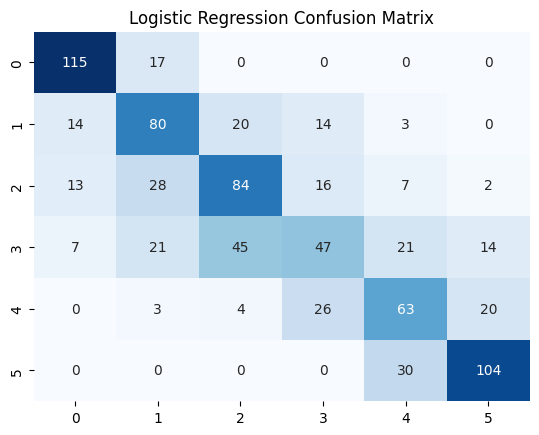

In [118]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



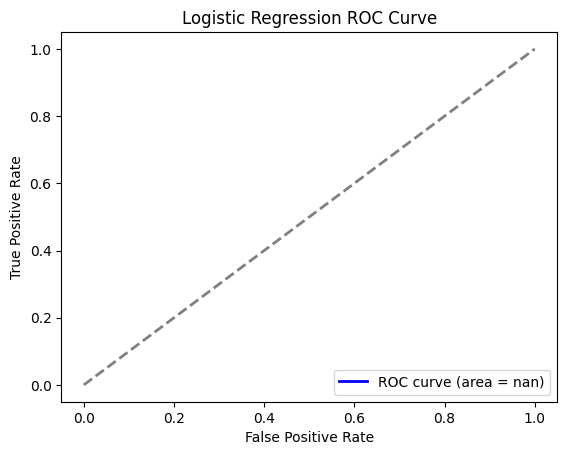

In [119]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()


Support Vector Classifier

In [120]:
# Support Vector Classifier Model
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [121]:
# Predictions and Evaluation
y_pred_svc = svc.predict(X_test)

In [122]:
# Classification Report
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

SVC Classification Report:
              precision    recall  f1-score   support

           3       0.89      1.00      0.94       132
           4       0.76      0.82      0.79       131
           5       0.63      0.65      0.64       150
           6       0.62      0.39      0.48       155
           7       0.76      0.81      0.79       116
           8       0.86      0.99      0.92       134

    accuracy                           0.76       818
   macro avg       0.75      0.78      0.76       818
weighted avg       0.75      0.76      0.75       818



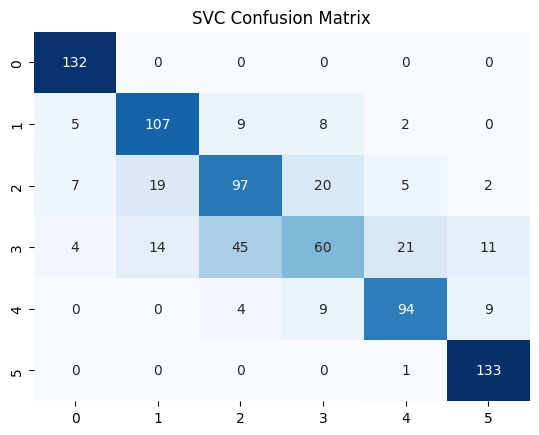

In [123]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVC Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



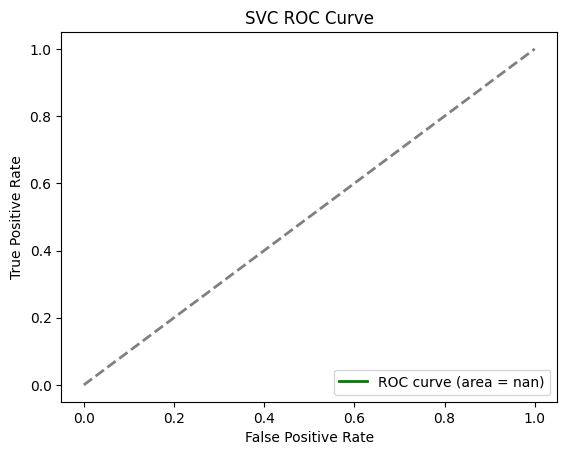

In [124]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, svc.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree

In [125]:
# Decision Tree Classifier Model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [126]:
# Predictions and Evaluation
y_pred_dtree = dtree.predict(X_test)

In [127]:
# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           3       0.89      0.98      0.94       132
           4       0.80      0.85      0.82       131
           5       0.68      0.63      0.66       150
           6       0.60      0.52      0.56       155
           7       0.77      0.83      0.80       116
           8       0.93      0.93      0.93       134

    accuracy                           0.78       818
   macro avg       0.78      0.79      0.78       818
weighted avg       0.77      0.78      0.77       818



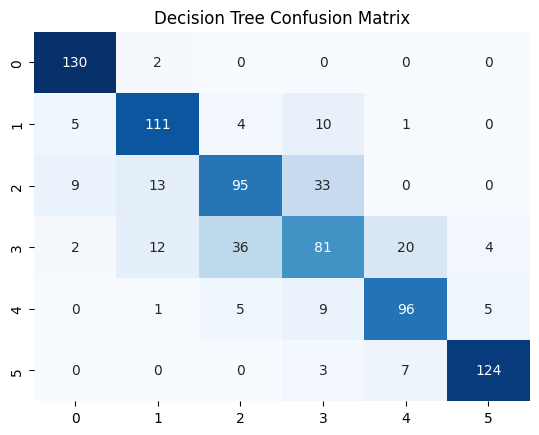

In [128]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dtree), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



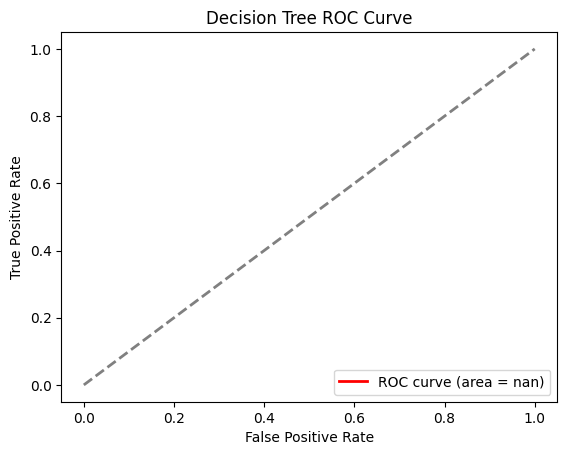

In [129]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, dtree.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest Classifier

In [130]:
# Random Forest Classifier Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [131]:
# Predictions and Evaluation
y_pred_rf = rf.predict(X_test)

In [132]:
# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       132
           4       0.88      0.98      0.92       131
           5       0.72      0.77      0.74       150
           6       0.74      0.52      0.61       155
           7       0.85      0.90      0.87       116
           8       0.94      0.99      0.96       134

    accuracy                           0.85       818
   macro avg       0.85      0.86      0.85       818
weighted avg       0.84      0.85      0.84       818



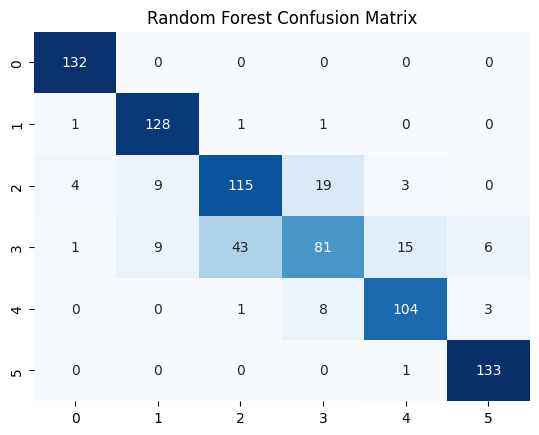

In [133]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



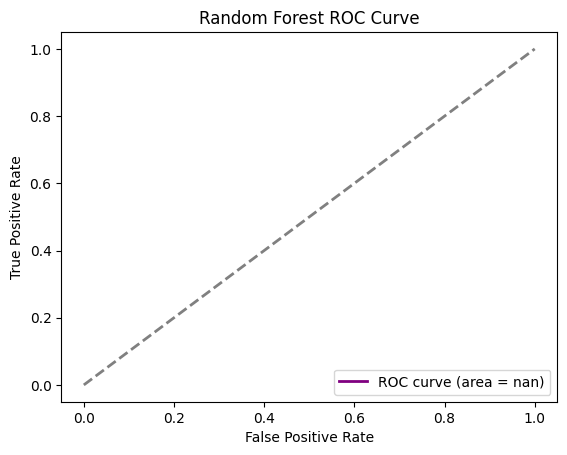

In [134]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

Gradient Boosting Classifier

In [135]:
# Gradient Boosting Classifier Model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [136]:
# Predictions and Evaluation
y_pred_gb = gb.predict(X_test)

In [137]:
# Classification Report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           3       0.92      0.98      0.95       132
           4       0.85      0.94      0.89       131
           5       0.70      0.70      0.70       150
           6       0.68      0.52      0.59       155
           7       0.75      0.82      0.78       116
           8       0.95      0.96      0.96       134

    accuracy                           0.81       818
   macro avg       0.81      0.82      0.81       818
weighted avg       0.80      0.81      0.80       818



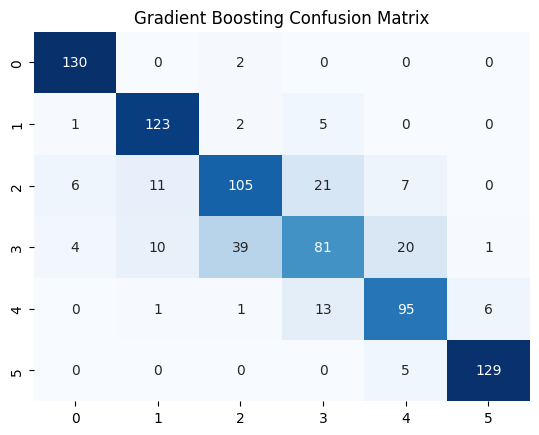

In [138]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



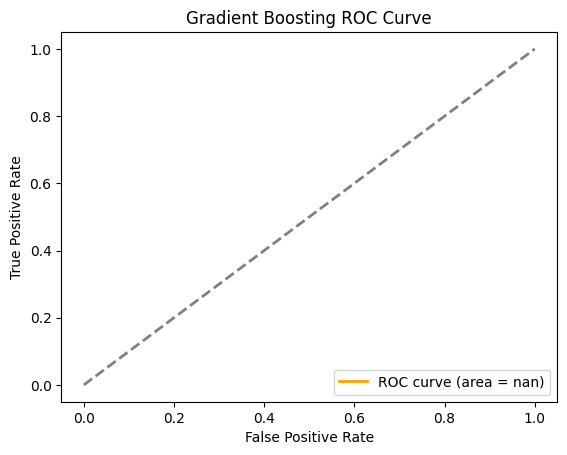

In [139]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gb.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.show()

K-Nearest Neighbours Classifier

In [140]:
# K-Nearest Neighbors Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [141]:
# Predictions and Evaluation
y_pred_knn = knn.predict(X_test)

In [142]:
# Classification Report
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           3       0.91      1.00      0.95       132
           4       0.72      0.96      0.83       131
           5       0.68      0.55      0.61       150
           6       0.68      0.34      0.45       155
           7       0.70      0.91      0.79       116
           8       0.86      0.99      0.92       134

    accuracy                           0.77       818
   macro avg       0.76      0.79      0.76       818
weighted avg       0.76      0.77      0.75       818



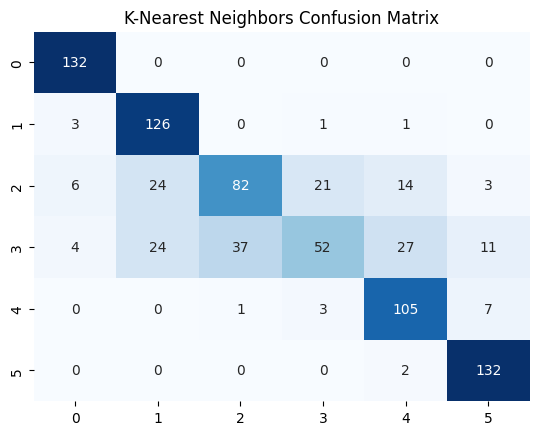

In [143]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



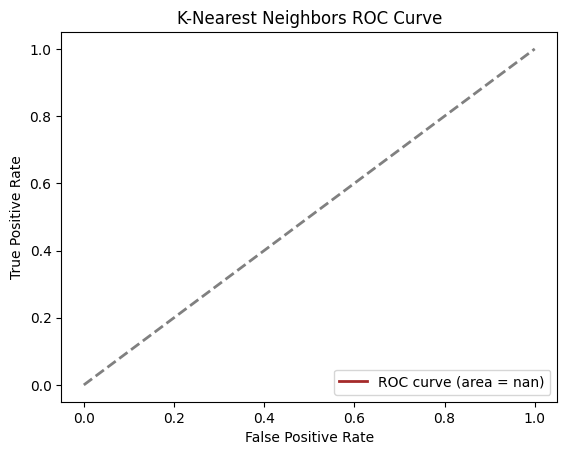

In [144]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='brown', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors ROC Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy

In [145]:
# Logistic Regression Accuracy
accuracy_logreg = logreg.score(X_test, y_test)
print(f'Logistic Regression Accuracy: {accuracy_logreg:.4f}')

Logistic Regression Accuracy: 0.6027


In [146]:
# SVC Accuracy
accuracy_svc = svc.score(X_test, y_test)
print(f'SVC Accuracy: {accuracy_svc:.4f}')

SVC Accuracy: 0.7616


In [147]:
# Decision Tree Accuracy
accuracy_dtree = dtree.score(X_test, y_test)
print(f'Decision Tree Accuracy: {accuracy_dtree:.4f}')

Decision Tree Accuracy: 0.7787


In [148]:
# Random Forest Accuracy
accuracy_rf = rf.score(X_test, y_test)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')


Random Forest Accuracy: 0.8472


In [149]:
# Gradient Boosting Accuracy
accuracy_gb = gb.score(X_test, y_test)
print(f'Gradient Boosting Accuracy: {accuracy_gb:.4f}')

Gradient Boosting Accuracy: 0.8105


In [150]:
# K-Nearest Neighbors Accuracy
accuracy_knn = knn.score(X_test, y_test)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}')

K-Nearest Neighbors Accuracy: 0.7689


In [151]:
#Importing required libraries
import plotly.express as px
import pandas as pd

# Accuracy values for each model
accuracies = {
    'Logistic Regression': accuracy_logreg,
    'SVC': accuracy_svc,
    'Decision Tree': accuracy_dtree,
    'Random Forest': accuracy_rf,
    'Gradient Boosting': accuracy_gb,
    'K-Nearest Neighbors': accuracy_knn
}

# Converting to a DataFrame for easy manipulation
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Plotly Pie Chart
fig = px.pie(accuracy_df,
             names='Model',
             values='Accuracy',
             title='Model Accuracy Comparison',
             color='Model',
             color_discrete_sequence=px.colors.qualitative.Set3)

# Adding hover information and make the chart responsive
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0, 0, 0, 0])  # Highlight first slice (Logistic Regression)
fig.update_layout(
    autosize=True,
    margin=dict(t=50, b=50, l=50, r=50),
    hovermode="closest"
)

# Showing the interactive chart
fig.show()


In [152]:
# Defineing good and bad wine based on quality (Quality >= 6 is good, < 6 is bad)
df['wine_quality'] = df['quality'].apply(lambda x: 'Good' if x >= 6 else 'Bad')

In [153]:
# Displaying basic statistics for acids (fixed acidity, volatile acidity, citric acid)
acid_columns = ['fixed acidity', 'volatile acidity', 'citric acid']
print(df[acid_columns + ['wine_quality']].groupby('wine_quality').describe())

             fixed acidity                                                 \
                     count      mean       std  min  25%  50%   75%   max   
wine_quality                                                                
Bad                  744.0  8.142204  1.572396  4.6  7.1  7.8  8.90  15.9   
Good                 855.0  8.474035  1.862795  4.7  7.1  8.0  9.65  15.6   

             volatile acidity            ...             citric acid  \
                        count      mean  ...   75%   max       count   
wine_quality                             ...                           
Bad                     744.0  0.589503  ...  0.68  1.58       744.0   
Good                    855.0  0.474146  ...  0.58  1.04       855.0   

                                                                
                  mean       std  min    25%   50%   75%   max  
wine_quality                                                    
Bad           0.237755  0.183368  0.0  0.080  0.22  0.36  

In [154]:
# Correlation of acid levels with quality
correlations = df[acid_columns + ['quality']].corr()
print("Correlations with Quality:")
print(correlations)

Correlations with Quality:
                  fixed acidity  volatile acidity  citric acid   quality
fixed acidity          1.000000         -0.256131     0.671703  0.124052
volatile acidity      -0.256131          1.000000    -0.552496 -0.390558
citric acid            0.671703         -0.552496     1.000000  0.226373
quality                0.124052         -0.390558     0.226373  1.000000


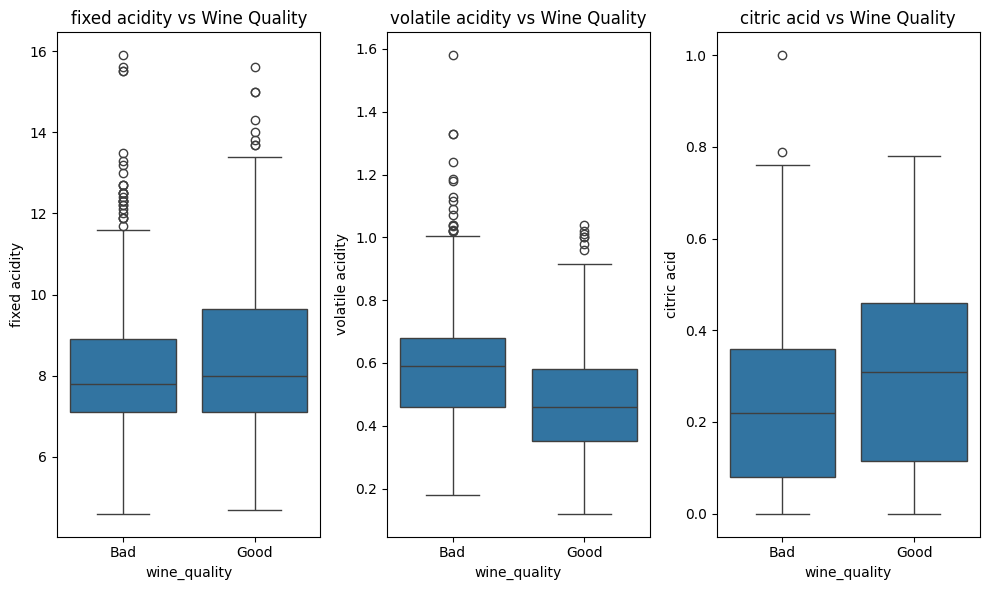

In [155]:
# Visualizing distribution of acid levels for good and bad wines
plt.figure(figsize=(10, 6))
for acid in acid_columns:
    plt.subplot(1, 3, acid_columns.index(acid) + 1)
    sns.boxplot(x='wine_quality', y=acid, data=df)
    plt.title(f'{acid} vs Wine Quality')

plt.tight_layout()
plt.show()

Histogram of Wine quality

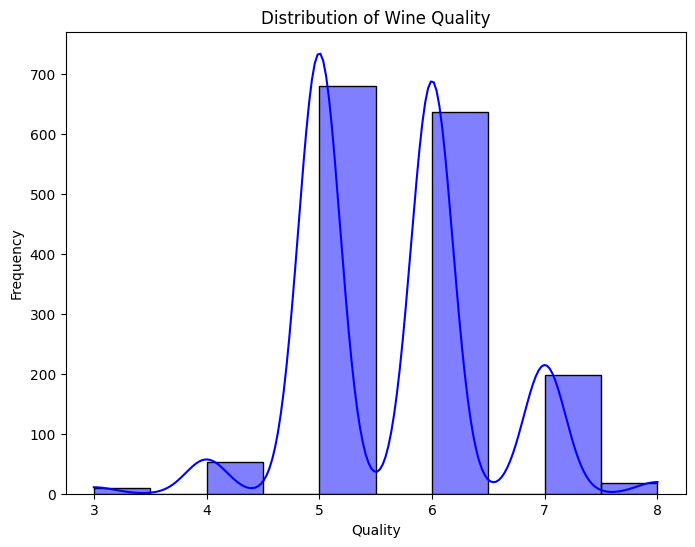

In [156]:
# Plotting Histogram for Wine Quality
plt.figure(figsize=(8, 6))
sns.histplot(df['quality'], kde=True, bins=10, color='blue')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

PairPlot for some features

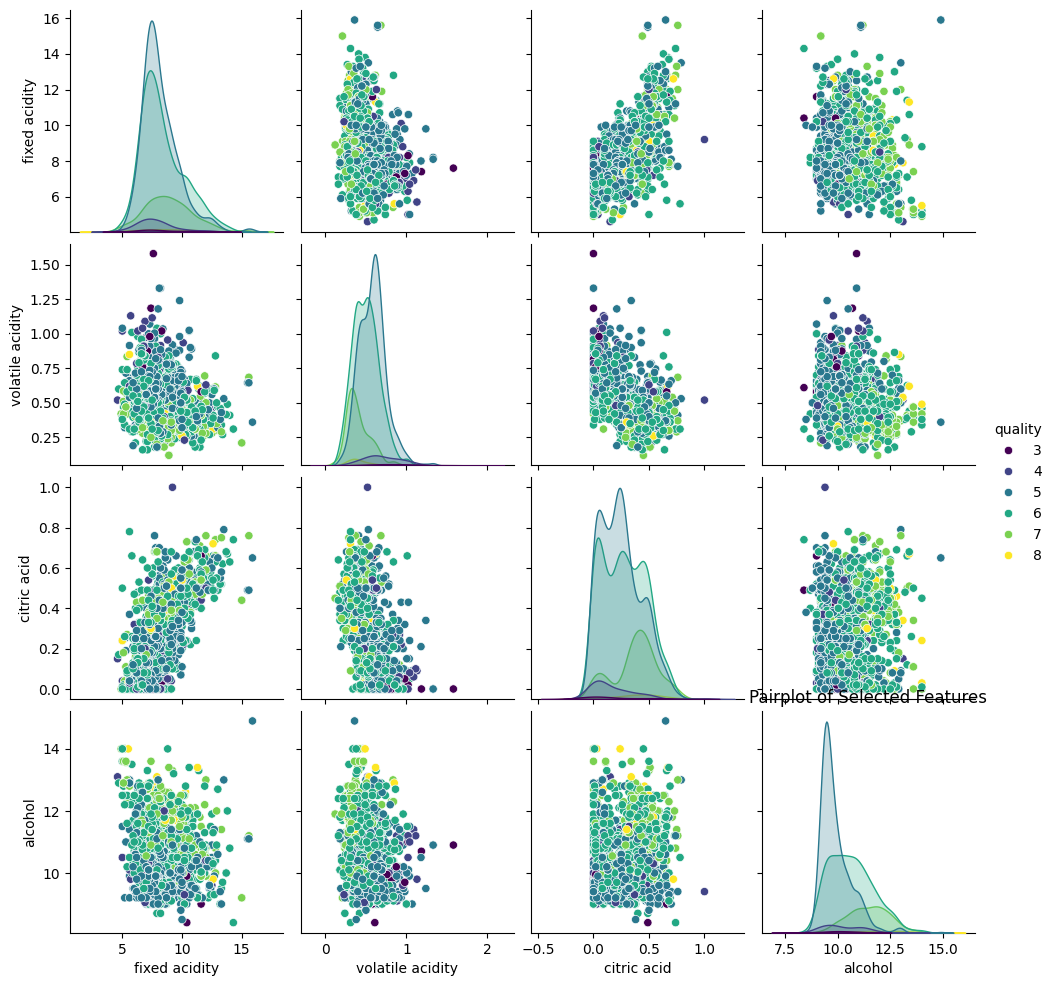

In [157]:
# Pairplot for selected columns
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'quality']
sns.pairplot(df[selected_features], hue='quality', palette='viridis')
plt.title('Pairplot of Selected Features')
plt.show()

Boxplot of Acid levels by wine quality

In [158]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


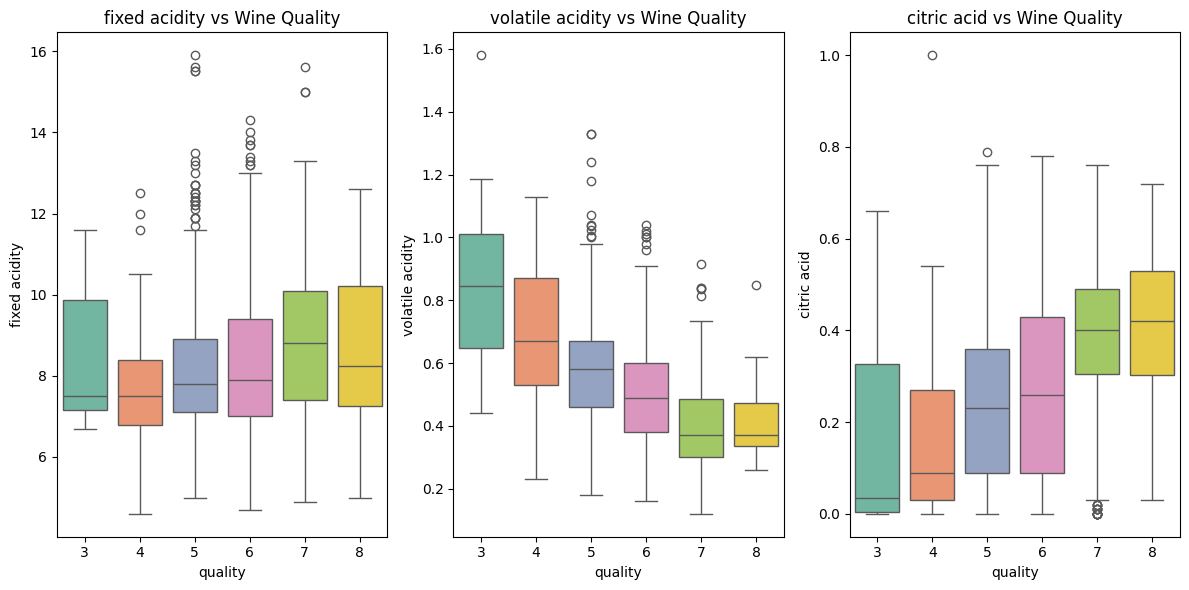

In [159]:
# Boxplot of Acids vs Wine Quality
plt.figure(figsize=(12, 6))
acid_columns = ['fixed acidity', 'volatile acidity', 'citric acid']
for acid in acid_columns:
    plt.subplot(1, 3, acid_columns.index(acid) + 1)
    sns.boxplot(x='quality', y=acid, data=df, palette='Set2')
    plt.title(f'{acid} vs Wine Quality')

plt.tight_layout()
plt.show()

Violin plot of Alcohol by Wine quality

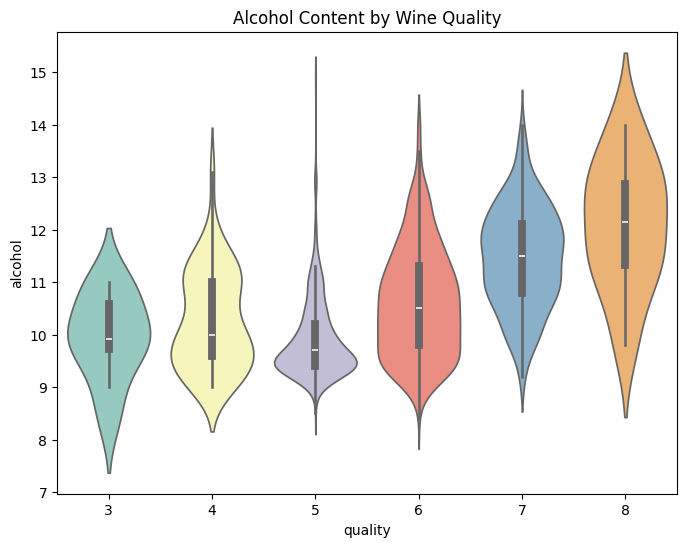

In [160]:
# Violin plot of Alcohol content by Wine Quality
plt.figure(figsize=(8, 6))
sns.violinplot(x='quality', y='alcohol', data=df, palette='Set3')
plt.title('Alcohol Content by Wine Quality')
plt.show()

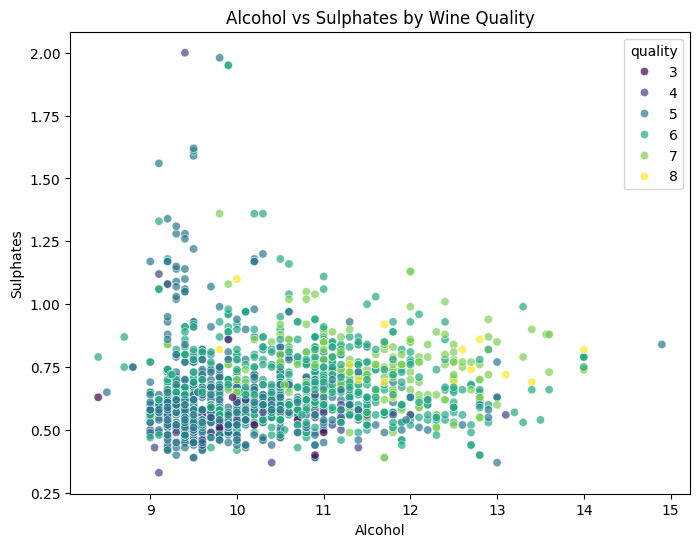

In [161]:
# Scatter plot of Alcohol vs Sulphates (Colored by Quality)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='sulphates', hue='quality', data=df, palette='viridis', alpha=0.7)
plt.title('Alcohol vs Sulphates by Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Sulphates')
plt.show()

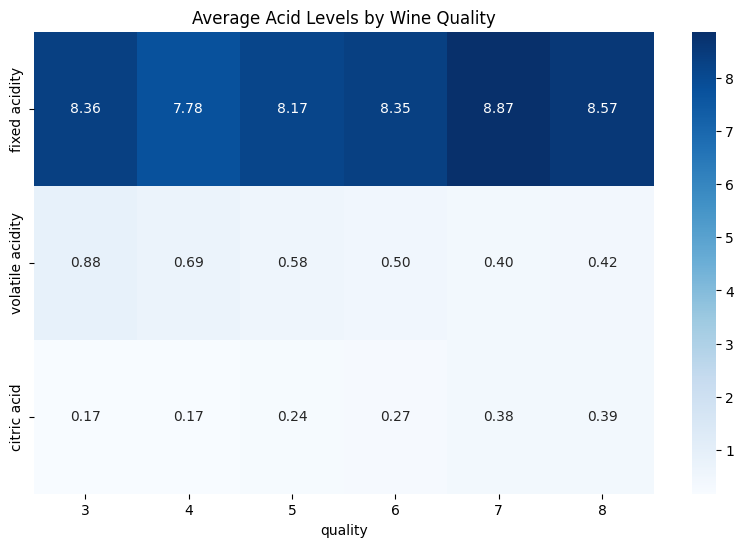

In [162]:
# Heatmap of acid levels by quality
plt.figure(figsize=(10, 6))
acid_data = df.groupby('quality')[acid_columns].mean().transpose()
sns.heatmap(acid_data, annot=True, cmap='Blues', fmt='.2f')
plt.title('Average Acid Levels by Wine Quality')
plt.show()

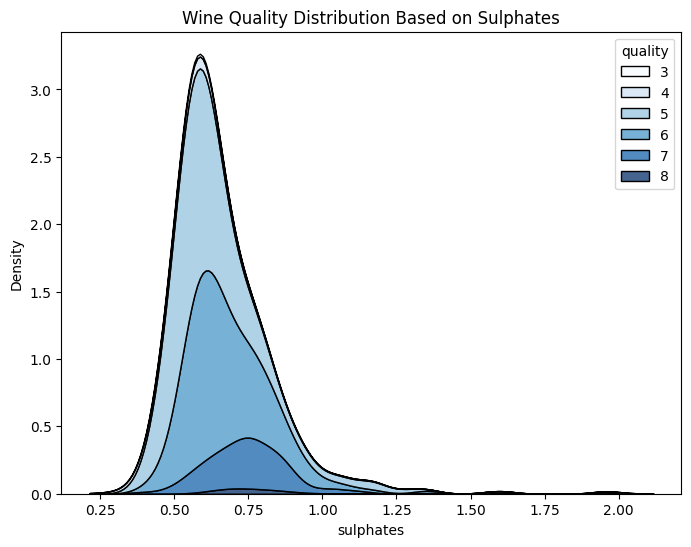

In [163]:
# Distribution of Wine Quality Based on Sulphates
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='sulphates', hue='quality', multiple='stack', palette='Blues')
plt.title('Wine Quality Distribution Based on Sulphates')
plt.show()


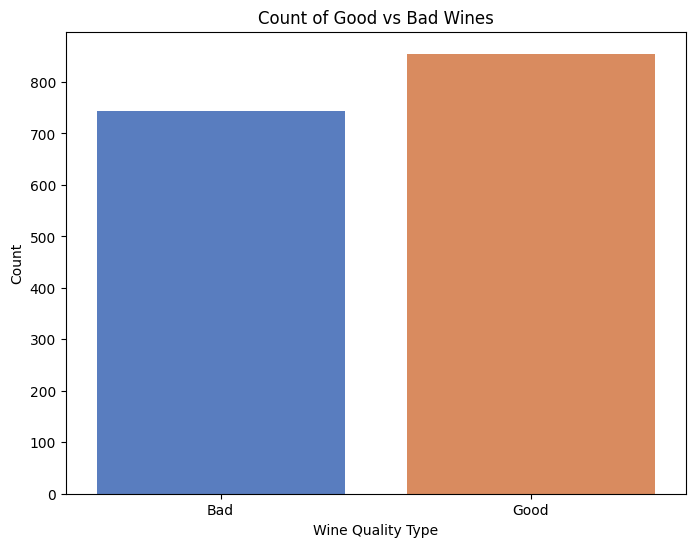

In [164]:
# Bar plot of wine quality count by type (Good/Bad)
plt.figure(figsize=(8, 6))
sns.countplot(x='wine_quality', data=df, palette='muted')
plt.title('Count of Good vs Bad Wines')
plt.xlabel('Wine Quality Type')
plt.ylabel('Count')
plt.show()

Model Evaluation


Logistic Regression Performance:
Accuracy: 0.5750
ROC AUC: Not Available
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       1.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.76      0.27      0.28       320
weighted avg       0.58      0.57      0.55       320



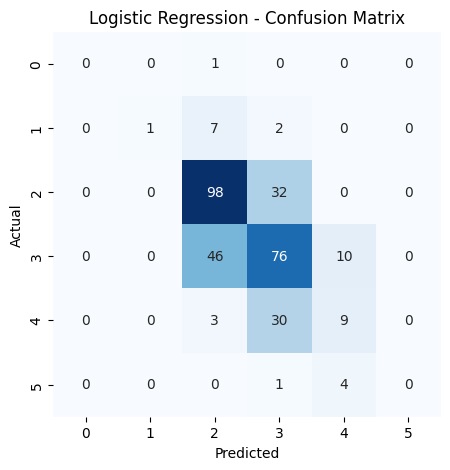


SVC Performance:
Accuracy: 0.6031
ROC AUC: Not Available
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.65      0.76      0.70       130
           6       0.56      0.64      0.60       132
           7       0.56      0.21      0.31        42
           8       1.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.80      0.27      0.27       320
weighted avg       0.62      0.60      0.57       320



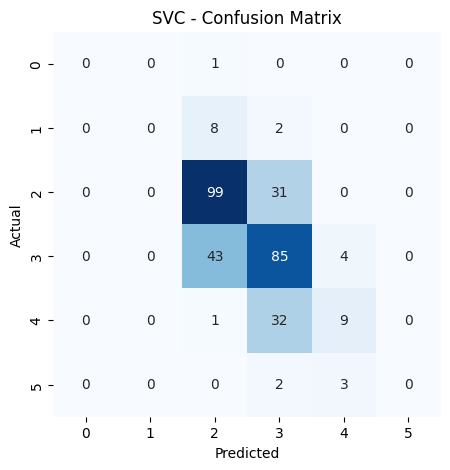


Decision Tree Performance:
Accuracy: 0.5813
ROC AUC: Not Available
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.10      0.11        10
           5       0.65      0.70      0.67       130
           6       0.57      0.55      0.56       132
           7       0.52      0.52      0.52        42
           8       0.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.57      0.58      0.58       320



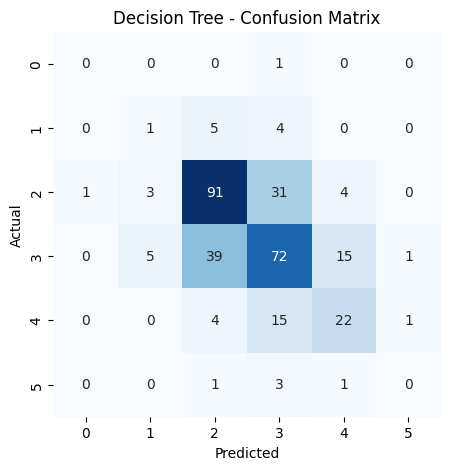


Random Forest Performance:
Accuracy: 0.6750
ROC AUC: Not Available
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.71      0.78      0.74       130
           6       0.64      0.70      0.67       132
           7       0.69      0.52      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.67      0.33      0.33       320
weighted avg       0.68      0.68      0.66       320



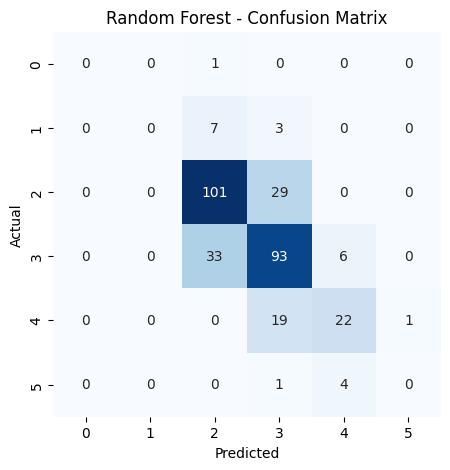


Gradient Boosting Performance:
Accuracy: 0.6188
ROC AUC: Not Available
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.67      0.20      0.31        10
           5       0.68      0.75      0.71       130
           6       0.59      0.61      0.60       132
           7       0.54      0.45      0.49        42
           8       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.41      0.33      0.35       320
weighted avg       0.61      0.62      0.61       320



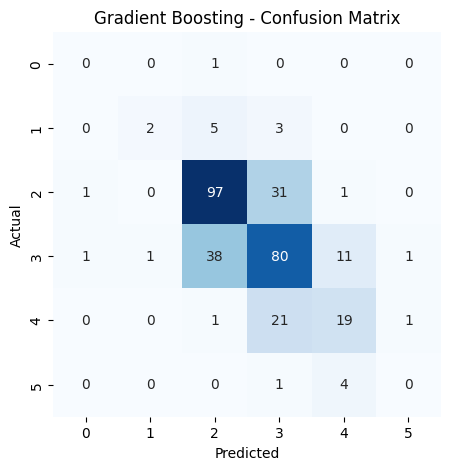


KNN Performance:
Accuracy: 0.5531
ROC AUC: Not Available
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.10      0.15        10
           5       0.60      0.68      0.64       130
           6       0.52      0.56      0.54       132
           7       0.52      0.33      0.41        42
           8       1.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.50      0.28      0.29       320
weighted avg       0.55      0.55      0.54       320



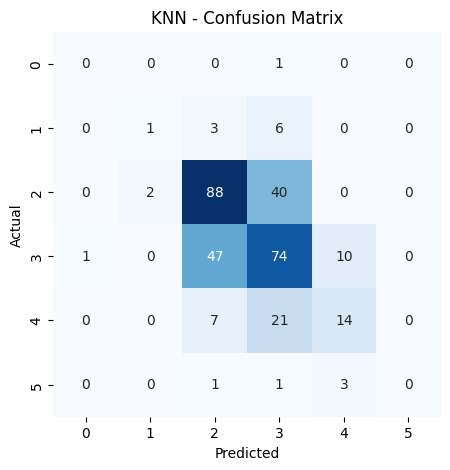

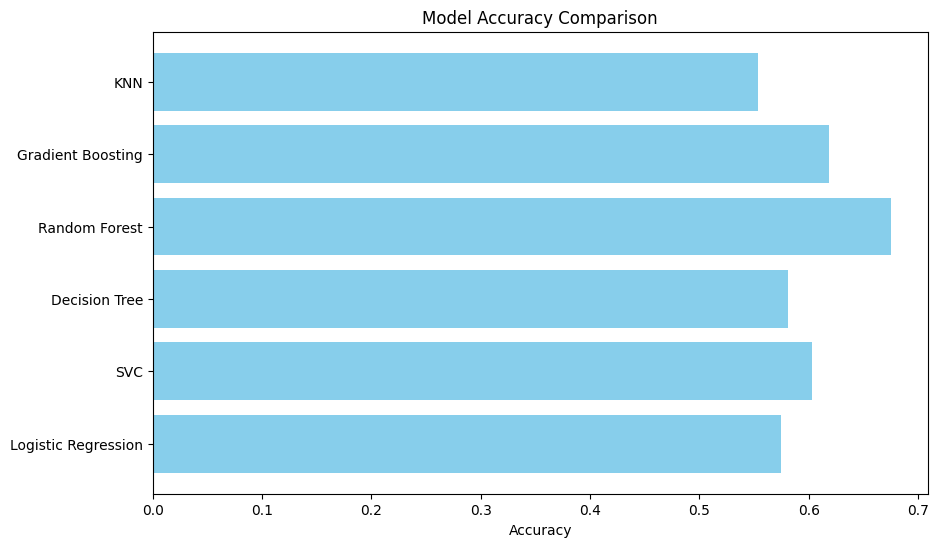

In [165]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the models
logreg = LogisticRegression(max_iter=1000)
svc = SVC(probability=True)
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()

# Models and names
models = [logreg, svc, dtree, rf, gb, knn]
model_names = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Dictionary to store results
results = {}

# Loop through each model, train, predict, and evaluate
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Classification Report
    class_report = classification_report(y_test, y_pred, zero_division=1)  # Handle zero division warnings

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC Curve and AUC (if model supports it)
    try:
        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
            fpr, tpr, thresholds = roc_curve(y_test, y_prob)
            auc_score = auc(fpr, tpr)
        else:
            auc_score = None
    except Exception as e:
        auc_score = None

    # Store results in dictionary
    results[name] = {
        'accuracy': accuracy,
        'classification_report': class_report,
        'confusion_matrix': cm,
        'roc_auc': auc_score
    }

# Display results
for model_name, result in results.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"ROC AUC: {result['roc_auc'] if result['roc_auc'] else 'Not Available'}")
    print("Classification Report:")
    print(result['classification_report'])

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# To compare accuracy visually
accuracy_scores = [result['accuracy'] for result in results.values()]
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


In [166]:
!jupyter nbconvert --clear-output --inplace your_notebook.ipynb

[NbConvertApp] WARNING | pattern 'your_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 